In [29]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.signal import find_peaks
import collections
from collections import namedtuple
import builtins
import math
# IMPORT Ole's fixed TMSiSDK python interfacwe- may change
sys.path.insert(0,'C:/Projects/tmsi-python-interface-old')
from TMSiSDK.file_readers import Poly5Reader
# import our library
sys.path.insert(0, '../resurfemg')
import helper_functions as hf



C:\Users\makeda\anaconda3\envs\emgandash\lib\site-packages\mne\fixes.py:321: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(scipy.__version__) >= '1.1':
C:\Users\makeda\anaconda3\envs\emgandash\lib\site-packages\mne\fixes.py:1134: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(numba.__version__) < LooseVersion('0.40'):
C:\Users\makeda\anaconda3\envs\emgandash\lib\site-packages\mne\fixes.py:1134: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(numba.__version__) < LooseVersion('0.40'):


In [3]:
new_emg_different = 'C:/Projects/20180523_225654.Data8Raw.Poly5'

In [6]:
data_emg = Poly5Reader(new_emg_different)
data_samples = data_emg.samples
emg_sample_rate = data_emg.sample_rate
converted_to_seconds =  []
converted_to_samples = []
for i in range(len(data_samples[0])):
    converted_to_seconds.append(i/emg_sample_rate)
    converted_to_samples.append(i)

Reading file  C:/Projects/20180523_225654.Data8Raw.Poly5
	 Number of samples:  10175502 
	 Number of channels:  18 
	 Sample rate: 500 Hz
Done reading data.


In [8]:
data_samples.shape

(18, 10175502)

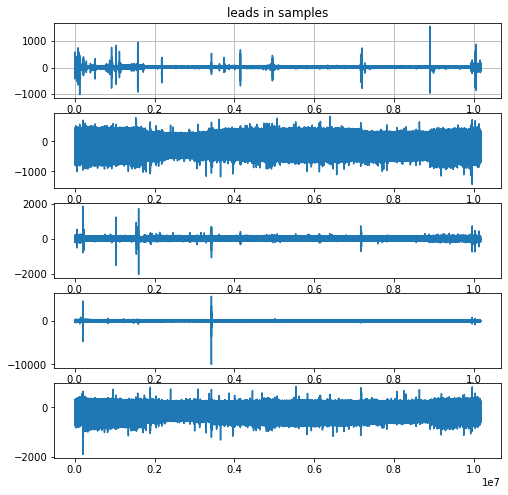

In [24]:
%matplotlib inline
# set up plotn
x = data_samples
fig, axis = plt.subplots(nrows = 5, ncols = 1, figsize=(8, 8))
#ax.set_ylim([-4, 4d])
axis[0].grid(True)
axis[0].plot(x[0])
axis[0].set(title='leads in samples')
axis[1].plot(x[1])
axis[2].plot(x[2])
axis[3].plot(x[3])
axis[4].plot(x[4])

# axis[5].plot(x[5])
# axis[6].plot(x[6])
# axis[7].plot(x[7])
# axis[8].plot(x[8])
# axis[9].plot(x[9])
# axis[10].plot(x[10])

# axis[11].plot(x[11])
# axis[12].plot(x[12])
# axis[13].plot(x[13])
# axis[14].plot(x[14])
# axis[15].plot(x[15])

# axis[16].plot(x[16])
# axis[17].plot(x[17])

plt.show()


In [13]:
accomanycsv= pd.read_csv('C:/Projects/20180523_225654.DataPF.csv')

C:\Users\makeda\AppData\Local\Temp\ipykernel_30856\2821689351.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  accomanycsv= pd.read_csv('C:/Projects/20180523_225654.DataPF.csv')


In [14]:
accomanycsv.head(5)

,Time,Events,RMS Int [uV],RMS F Dia [uV],RMS D Dia [uV],RMS Abd [uV],RMS R Dia [uV],RMS L Dia [uV],Paw [mB],Pes [mB],Pga [mB]
0,0:00:00.060,22:56:54,4.014,8.508,3.578,2.783,7.867,7.867,-0.001,-0.012,0.008
1,0:00:00.080,NaN,4.059,7.916,3.376,2.602,7.487,7.487,0.003,-0.006,0.015
2,0:00:00.100,NaN,4.117,7.379,3.184,2.449,7.103,7.103,0.004,-0.005,0.014
3,0:00:00.120,NaN,4.188,6.894,3.006,2.322,6.723,6.723,0.006,-0.004,0.015
4,0:00:00.140,NaN,4.272,6.453,2.842,2.223,6.347,6.347,0.002,-0.008,0.007


In [15]:
accomanycsv.shape

(1017536, 11)

In [17]:
data_samples.shape

(18, 10175502)

In [19]:
converted = pd.DataFrame(data = data_samples)

In [21]:
converted.head(15)

,0,1,2,3,4,5,6,7,8,9,...,10175492,10175493,10175494,10175495,10175496,10175497,10175498,10175499,10175500,10175501
0,-3.898192,-5.614154,-3.809548,-1.443963,-1.021803,0.774888,5.007726,6.679644,3.018006,-2.513429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-3.648056,5.314520,13.854936,17.307537,16.802999,28.410530,34.248634,33.169098,24.177605,15.969131,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.737297,2.730896,-7.749369,-4.913290,2.760850,0.071360,-0.602723,0.797038,1.278135,1.854848,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-4.564402,-4.107004,-4.308214,-4.920402,-6.510462,-14.278773,-16.725796,-15.540417,-11.529875,-8.461237,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-5.053710,3.765554,13.764119,19.262209,17.158730,16.434097,16.073034,15.235250,16.051998,16.940401,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-5.053710,3.765554,13.764119,19.262209,17.158730,16.434097,16.073034,15.235250,16.051998,16.940401,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.400235,4.409757,4.419418,4.429036,4.438768,4.448578,4.458200,4.467860,4.477653,4.487574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5.735417,5.704149,5.673203,5.643038,5.613090,5.583278,5.553516,5.524022,5.494696,5.465422,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2.551069,2.538372,2.526367,2.514214,2.502423,2.490600,2.479036,2.467052,2.455791,2.444718,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2.024127,2.020656,2.017514,2.015030,2.012659,2.010394,2.008344,2.006797,2.005352,2.003964,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
import scipy
#C:\Projects
import scipy.io as sio

In [4]:
file_name = 'C://Projects/data_sEMG_test.mat'
file =sio.loadmat(file_name, mdict=None, appendmat=True)

In [5]:
file

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Aug 29 15:42:59 2022',
 '__version__': '1.0',
 '__globals__': [],
 'data_emg': array([[ 0.00183105,  0.00793457,  0.0012207 , -0.00244141, -0.00427246],
        [ 0.00030518,  0.00640869,  0.00152588, -0.00183105, -0.00488281],
        [ 0.00030518,  0.00549316,  0.00091553, -0.00213623, -0.00488281],
        ...,
        [ 0.00183105,  0.        ,  0.00427246,  0.00518799, -0.00061035],
        [ 0.00305176,  0.00091553,  0.00396729,  0.00244141, -0.00244141],
        [ 0.00183105,  0.        ,  0.00335693, -0.00640869, -0.00396729]])}

In [19]:
file.keys()

dict_keys(['__header__', '__version__', '__globals__', 'data_emg'])

In [22]:
file.values()

dict_values([b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Aug 29 15:42:59 2022', '1.0', [], array([[ 0.00183105,  0.00793457,  0.0012207 , -0.00244141, -0.00427246],
       [ 0.00030518,  0.00640869,  0.00152588, -0.00183105, -0.00488281],
       [ 0.00030518,  0.00549316,  0.00091553, -0.00213623, -0.00488281],
       ...,
       [ 0.00183105,  0.        ,  0.00427246,  0.00518799, -0.00061035],
       [ 0.00305176,  0.00091553,  0.00396729,  0.00244141, -0.00244141],
       [ 0.00183105,  0.        ,  0.00335693, -0.00640869, -0.00396729]])])

In [23]:
file['__header__']

b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Aug 29 15:42:59 2022'

In [24]:
file['__version__']

'1.0'

In [25]:
file['__globals__']

[]

In [26]:
file['data_emg']

array([[ 0.00183105,  0.00793457,  0.0012207 , -0.00244141, -0.00427246],
       [ 0.00030518,  0.00640869,  0.00152588, -0.00183105, -0.00488281],
       [ 0.00030518,  0.00549316,  0.00091553, -0.00213623, -0.00488281],
       ...,
       [ 0.00183105,  0.        ,  0.00427246,  0.00518799, -0.00061035],
       [ 0.00305176,  0.00091553,  0.00396729,  0.00244141, -0.00244141],
       [ 0.00183105,  0.        ,  0.00335693, -0.00640869, -0.00396729]])

In [27]:
file['data_emg'].shape

(200000, 5)

In [33]:
file['data_emg'][:, 0]

array([0.00183105, 0.00030518, 0.00030518, ..., 0.00183105, 0.00305176,
       0.00183105])

we have the info that it was run at 2000 hertz for 100 seconds, 5 leads, note this file type does not seem to record the frequency of sampling

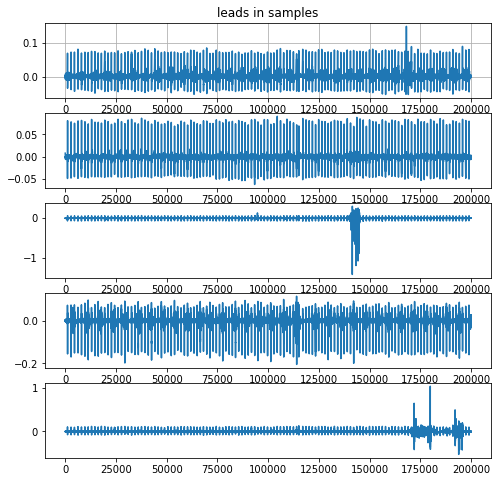

In [34]:
%matplotlib inline
# set up plotn
x = file['data_emg'] # data_samples
fig, axis = plt.subplots(nrows = 5, ncols = 1, figsize=(8, 8))
#ax.set_ylim([-4, 4d])
axis[0].grid(True)
axis[0].plot(x[:, 0])
axis[0].set(title='leads in samples')
axis[1].plot(x[:,1])
axis[2].plot(x[:,2])
axis[3].plot(x[:,3])
axis[4].plot(x[:,4])


OK, so now the question is to write something generalizable so we can have 3,5,or even 18 leads...

In [35]:
def working_pipeline_pre_entropy(our_chosen_samples): 
    cut_file_data = hf.bad_end_cutter_for_samples(our_chosen_samples, percent_to_cut=3, tolerance_percent=5)
    bd_filtered_file_data = hf.emg_bandpass_butter_sample(cut_file_data, 5, 450, 2048, output='sos')
    # step 3 end-cutting again to get rid of filtering artifacts
    re_cut_file_data = hf.bad_end_cutter_for_samples(bd_filtered_file_data, percent_to_cut=3, tolerance_percent=5)
    # skip step4 and do step 5 ICA
    components = hf.compute_ICA_two_comp(re_cut_file_data)
    #     the picking step!
    emg= hf.pick_more_peaks_array(components)
    # now process it in final steps
    abs_values = abs(emg)
    final_envelope_d = hf.emg_highpass_butter(abs_values, 150, 2048)
    
        
    return final_envelope_d

In [38]:
cut_file_data = hf.bad_end_cutter_for_samples(file['data_emg'], percent_to_cut=3, tolerance_percent=5)

In [40]:
cut_file_data.shape

(200000, 4)

The above did not work- it cuts the last lead. Maybe we need tomchange the shape with a roll, lets compare to our typical file

In [43]:
typical_file_chosen = '../not_pushed/topspin_data_anonymized/M001/001/EMG_recording.Poly5'

In [44]:
data_emg = Poly5Reader(typical_file_chosen)
data_samples= data_emg.samples
emg_sample_rate = data_emg.sample_rate
converted_to_seconds =  []
converted_to_samples = []
for i in range(len(data_samples[0])):
    converted_to_seconds.append(i/emg_sample_rate)
    converted_to_samples.append(i)

Reading file  ../not_pushed/topspin_data_anonymized/M001/001/EMG_recording.Poly5
	 Number of samples:  172576 
	 Number of channels:  3 
	 Sample rate: 2048 Hz
Done reading data.


In [47]:
data_samples.shape

(3, 174720)

In [48]:
file['data_emg'].shape

(200000, 5)

In [ ]:
There we go, we must resolve this so we get the same shaped array before we process it.

In [49]:
rot = np.rot90(file['data_emg'])
rot.shape

(5, 200000)

In [50]:
cut_file_data = hf.bad_end_cutter_for_samples(rot, percent_to_cut=3, tolerance_percent=5)
cut_file_data.shape

(5, 194000)

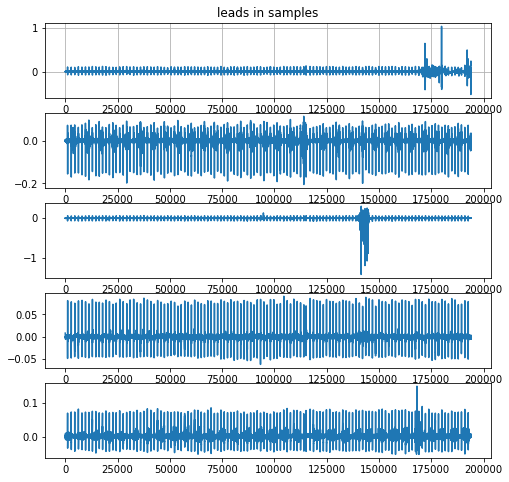

In [52]:
%matplotlib inline
# set up plotn
x = cut_file_data # data_samples
fig, axis = plt.subplots(nrows = 5, ncols = 1, figsize=(8, 8))
#ax.set_ylim([-4, 4d])
axis[0].grid(True)
axis[0].plot(x[0])
axis[0].set(title='leads in samples')
axis[1].plot(x[1])
axis[2].plot(x[2])
axis[3].plot(x[3])
axis[4].plot(x[4])